# 次元削減
教師なし学習の一種。
たくさんの特徴量（高次元）で構成されるデータから、本質的な特徴を表す特徴量（低次元）を作成する。
教師あり学習の前処理や、可視化を目的として行われる事が多い。

In [19]:
# 必要なライブラリのimport
# 機械学習をする際にはほぼ全て必要となるため、予めimportしておくとよい。

# 配列
import numpy as np 
# データ変換・可視化
import pandas as pd
# 機械学習
import sklearn

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# データ可視化
機械学習を行う前にまずデータを観察することが重要。

In [20]:
# 3種類のワインとその特徴量を持つデータをimport
from sklearn.datasets import load_wine
wine_data = load_wine()

print(wine_data.DESCR) # 概要を表示
print(wine_data.feature_names) # ラベルを表示

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [21]:
# 特徴量（説明変数（目的変数を説明する変数）とも呼ばれる）の確認
# numpyの状態だと見難いため、DataFrameに格納して確認する

# DataFrameを作成する。カラム名にfeature_namesの文字列を使用する
df_X = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [22]:
# 目的変数（予測したい変数）
df_y = pd.DataFrame(data=wine_data.target, columns=["wine class"])

df_y.head(10)

,wine class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


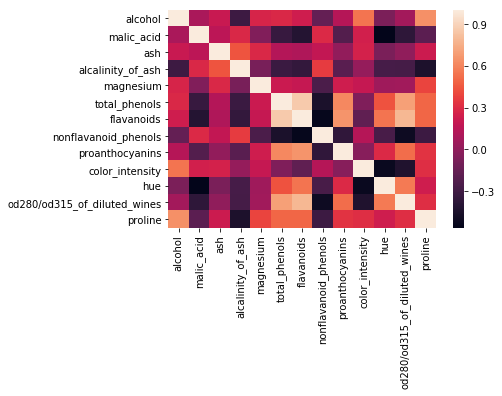

In [17]:
# 特徴量が多いため、ヒートマップで可視化する。
sns.heatmap(df_X.corr())

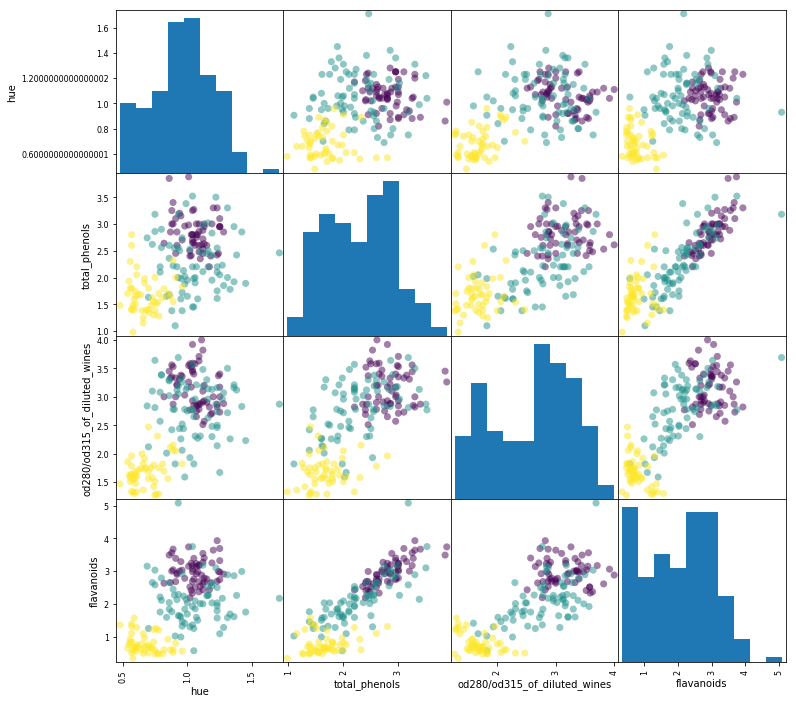

In [54]:
# padnasの散布図作成機能のimport
from pandas.plotting import scatter_matrix

# 相関が強そうな項目を可視化
scatter_matrix(df_X.loc[:,['hue', 'total_phenols',"od280/od315_of_diluted_wines","flavanoids"]], figsize=(12,12), s=200, c=df_y.values.reshape(-1))
plt.show()

## PCA (Principal Component analysis)
データセットの特徴量を相互に統計的に関連しないように回転し、
回転した後の特徴量から、重要な一部分の特徴量だけを抜き出す

In [75]:
from sklearn.decomposition import PCA

reduced_X = PCA(n_components=2).fit_transform(df_X.loc[:,['hue', 'total_phenols',"od280/od315_of_diluted_wines","flavanoids"]])

# 二次元に圧縮されていることがわかる。
reduced_X.ndim

2

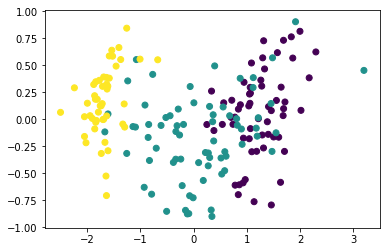

In [76]:
# 可視化する。
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=df_y.values.reshape(-1))

# 非負値行列因子分解(NMF)
係数と成分が非負の場合に使用できる。
PCAよりも理解しやすい成分となることが多い。

In [77]:
from sklearn.decomposition import NMF

# 学習かつ変更を行うメソッドを実行する
# 可視化の関係上2次元に圧縮する。

reduced_X = NMF(n_components=2).fit_transform(df_X.loc[:,['hue', 'total_phenols',"od280/od315_of_diluted_wines","flavanoids"]])

# 二次元に圧縮されていることがわかる。
reduced_X.ndim

2

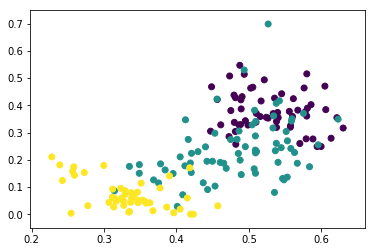

In [78]:
# 可視化する。
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=df_y.values.reshape(-1))

# t-SNE (t-distributed Stochastic Neighbor Embedding)
主に可視化に用いられる。
データ間の類似度を表現する条件付き確率を、できるだけ保つ変化を行う。


In [87]:
from sklearn.manifold import TSNE

# t-sneはデータを学習し、未知のデータに対して行うことはできない。
reduced_X = TSNE(n_components=2).fit_transform(df_X.loc[:,['hue', 'total_phenols',"od280/od315_of_diluted_wines","flavanoids"]])

# 二次元に圧縮されていることがわかる。
reduced_X.ndim

2

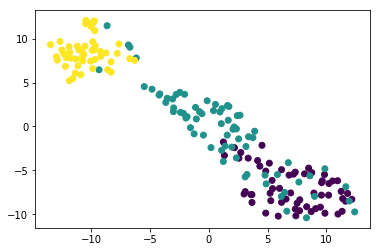

In [88]:
# 可視化する。
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=df_y.values.reshape(-1))